In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 
import tensorflow as tf
import numpy as np

model_save_path = 'keypoint_classifier.hdf5'
tflite_save_path = 'keypoint_classifier.tflite'

In [2]:
df = pd.read_csv('body_language.csv')

X = df.drop('class', axis=1) # features
y = df['class'] # target value.csv')

In [19]:
y.unique()

array([0, 'Hello', 'Happy', 'Schocked', 'Zen', 'Flex', 'Bored', 'Shut up',
       'Amazed'], dtype=object)

In [20]:
y = y.replace('Normal', 0)
y = y.replace('Hello', 1)
y = y.replace('Happy', 2)
y = y.replace('Schocked', 3)
y = y.replace('Zen', 4)
y = y.replace('Flex', 5)
y = y.replace('Bored', 6)
y = y.replace('Shut up', 7)
y = y.replace('Amazed', 8)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [22]:
X.shape

(3078, 2004)

In [23]:
X.head()

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,0.500612,0.452876,-0.717999,0.999862,0.522420,0.400255,-0.688210,0.999731,0.534659,0.402437,...,-0.003003,0.0,0.543812,0.412630,0.008330,0.0,0.547059,0.408996,0.008456,0.0
1,0.500063,0.452399,-0.866543,0.999845,0.522119,0.399961,-0.834415,0.999717,0.534345,0.402258,...,-0.003242,0.0,0.542631,0.415198,0.008169,0.0,0.545842,0.412312,0.008228,0.0
2,0.499499,0.451504,-0.860347,0.999839,0.521703,0.399316,-0.830216,0.999712,0.533930,0.401717,...,-0.002748,0.0,0.542152,0.414197,0.008416,0.0,0.545361,0.411402,0.008472,0.0
3,0.498793,0.450771,-0.856317,0.999835,0.521021,0.398866,-0.826523,0.999712,0.533336,0.401360,...,-0.002681,0.0,0.541394,0.414002,0.008241,0.0,0.544592,0.411154,0.008290,0.0
4,0.497706,0.450340,-0.866300,0.999826,0.520192,0.398711,-0.835141,0.999707,0.532671,0.401267,...,-0.002482,0.0,0.541047,0.412120,0.008461,0.0,0.544224,0.409352,0.008514,0.0


In [24]:
NUM_CLASSES = len(y.unique())
print(NUM_CLASSES)

9


In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((2004, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [26]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 2004)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              2005000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_8 (Dense)              (None, 9)                 4509      
Total params: 2,510,009
Trainable params: 2,510,009
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [28]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:

model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
17/17 [==============================] - 1s 21ms/step - loss: 2.1908 - accuracy: 0.2461 - val_loss: 1.8476 - val_accuracy: 0.3074

Epoch 00001: saving model to keypoint_classifier.hdf5
Epoch 2/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.6594 - accuracy: 0.4271 - val_loss: 1.2444 - val_accuracy: 0.5855

Epoch 00002: saving model to keypoint_classifier.hdf5
Epoch 3/1000
17/17 [==============================] - 0s 12ms/step - loss: 1.2438 - accuracy: 0.5673 - val_loss: 1.0355 - val_accuracy: 0.6223

Epoch 00003: saving model to keypoint_classifier.hdf5
Epoch 4/1000
17/17 [==============================] - 0s 13ms/step - loss: 1.0056 - accuracy: 0.6541 - val_loss: 0.7007 - val_accuracy: 0.8117

Epoch 00004: saving model to keypoint_classifier.hdf5
Epoch 5/1000
17/17 [==============================] - 0s 13ms/step - loss: 0.8424 - accuracy: 0.6964 - val_loss: 0.6229 - val_accuracy: 0.8301

Epoch 00005: saving model to keypoint_classifier.hdf5
Epoch 6/10

17/17 [==============================] - 0s 14ms/step - loss: 0.2120 - accuracy: 0.9271 - val_loss: 0.0797 - val_accuracy: 0.9816

Epoch 00042: saving model to keypoint_classifier.hdf5
Epoch 43/1000
17/17 [==============================] - 0s 14ms/step - loss: 0.2063 - accuracy: 0.9234 - val_loss: 0.0827 - val_accuracy: 0.9708

Epoch 00043: saving model to keypoint_classifier.hdf5
Epoch 44/1000
17/17 [==============================] - 0s 14ms/step - loss: 0.2139 - accuracy: 0.9280 - val_loss: 0.0993 - val_accuracy: 0.9654

Epoch 00044: saving model to keypoint_classifier.hdf5
Epoch 45/1000
17/17 [==============================] - 0s 15ms/step - loss: 0.1792 - accuracy: 0.9350 - val_loss: 0.0791 - val_accuracy: 0.9838

Epoch 00045: saving model to keypoint_classifier.hdf5
Epoch 46/1000
17/17 [==============================] - 0s 14ms/step - loss: 0.1992 - accuracy: 0.9243 - val_loss: 0.0895 - val_accuracy: 0.9794

Epoch 00046: saving model to keypoint_classifier.hdf5
Epoch 47/1000
17/17

17/17 [==============================] - 0s 14ms/step - loss: 0.1947 - accuracy: 0.9369 - val_loss: 0.0641 - val_accuracy: 0.9881

Epoch 00083: saving model to keypoint_classifier.hdf5
Epoch 84/1000
17/17 [==============================] - 0s 14ms/step - loss: 0.1442 - accuracy: 0.9475 - val_loss: 0.0545 - val_accuracy: 0.9870

Epoch 00084: saving model to keypoint_classifier.hdf5
Epoch 85/1000
17/17 [==============================] - 0s 14ms/step - loss: 0.1412 - accuracy: 0.9508 - val_loss: 0.0496 - val_accuracy: 0.9848

Epoch 00085: saving model to keypoint_classifier.hdf5
Epoch 86/1000
17/17 [==============================] - 0s 13ms/step - loss: 0.1618 - accuracy: 0.9406 - val_loss: 0.0807 - val_accuracy: 0.9697

Epoch 00086: saving model to keypoint_classifier.hdf5
Epoch 87/1000
17/17 [==============================] - 0s 14ms/step - loss: 0.1676 - accuracy: 0.9350 - val_loss: 0.0538 - val_accuracy: 0.9881

Epoch 00087: saving model to keypoint_classifier.hdf5
Epoch 88/1000
17/17

17/17 [==============================] - 0s 14ms/step - loss: 0.1442 - accuracy: 0.9536 - val_loss: 0.0404 - val_accuracy: 0.9881

Epoch 00124: saving model to keypoint_classifier.hdf5
Epoch 125/1000
17/17 [==============================] - 0s 14ms/step - loss: 0.1425 - accuracy: 0.9522 - val_loss: 0.0472 - val_accuracy: 0.9859

Epoch 00125: saving model to keypoint_classifier.hdf5
Epoch 126/1000
17/17 [==============================] - 0s 15ms/step - loss: 0.1529 - accuracy: 0.9461 - val_loss: 0.0471 - val_accuracy: 0.9881

Epoch 00126: saving model to keypoint_classifier.hdf5
Epoch 127/1000
17/17 [==============================] - 0s 15ms/step - loss: 0.1464 - accuracy: 0.9424 - val_loss: 0.0420 - val_accuracy: 0.9913

Epoch 00127: saving model to keypoint_classifier.hdf5
Epoch 128/1000
17/17 [==============================] - 0s 14ms/step - loss: 0.1398 - accuracy: 0.9503 - val_loss: 0.0684 - val_accuracy: 0.9697

Epoch 00128: saving model to keypoint_classifier.hdf5
Epoch 129/1000


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

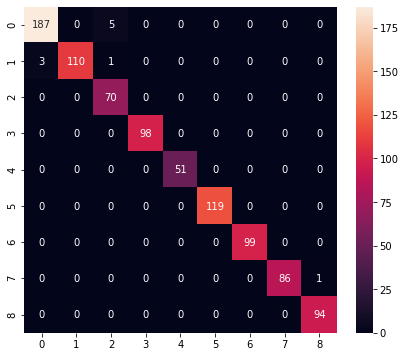

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       192
           1       1.00      0.96      0.98       114
           2       0.92      1.00      0.96        70
           3       1.00      1.00      1.00        98
           4       1.00      1.00      1.00        51
           5       1.00      1.00      1.00       119
           6       1.00      1.00      1.00        99
           7       1.00      0.99      0.99        87
           8       0.99      1.00      0.99        94

    accuracy                           0.99       924
   macro avg       0.99      0.99      0.99       924
weighted avg       0.99      0.99      0.99       924



In [31]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [32]:
model.save(model_save_path, include_optimizer=False)

In [33]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/z4/nmp23sqj1fl9mspn4lqjv5b40000gn/T/tmprx02lgfl/assets


2516592

In [35]:
interpreter = tf.lite.Interpreter(model_path='keypoint_classifier.tflite', num_threads=1)

In [36]:
interpreter